# Uvod i opis problema
U ovoj vežbi ćemo se baviti klasifikacijom odeće iz dataseta FashionMNIST. Pre svega pogledajmo kako izgleda naša baza slika.
Baza se sastoji od oko 70 000 labeliranih slika odeće, obuće i aksesoara. 
Vaš zadatak je da napravite model neuralne mreže koji će klasifikovati ove slike.

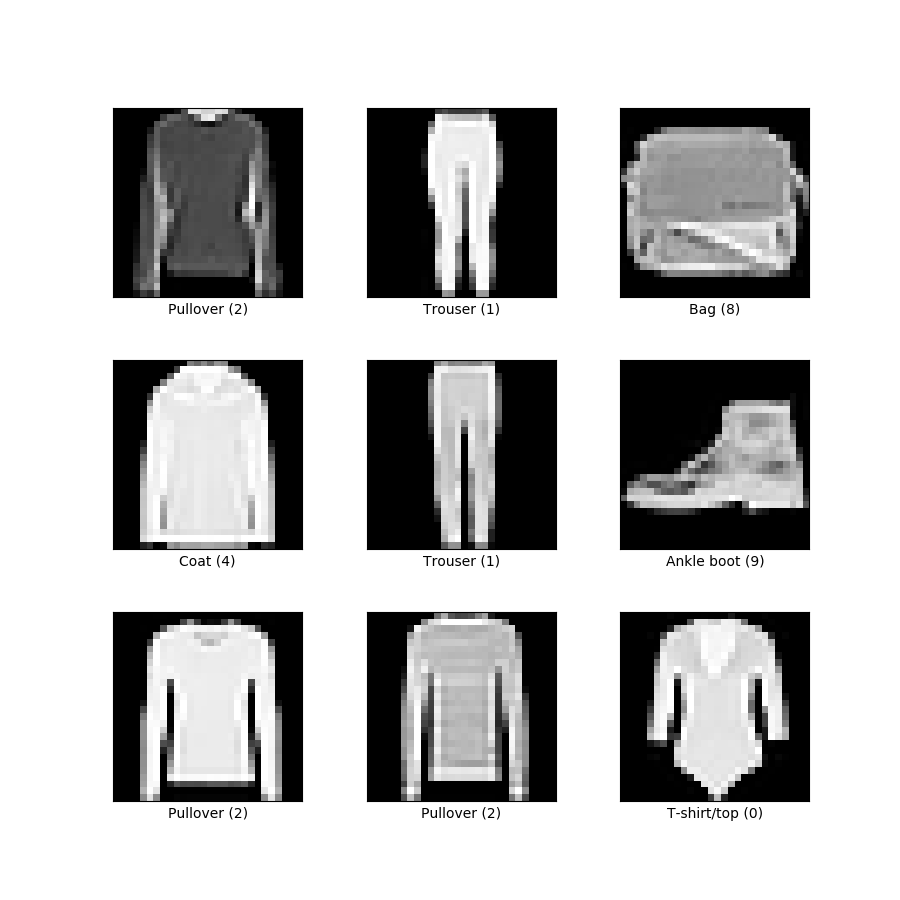

Za početak je potrebno importovati sve potrebne biblioteke

In [17]:
import numpy as np

import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

#za testirnje
from testbench import Testbench

In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Potrebno je da bazu koju koristimo importujemo u našu svesku. Podatke delimo u dva seta(set za treniranje i za testiranje mreže).
Pri podeli baze potrebno je da slike transformišemo PIL -> Tensor.

In [3]:
train_set = torchvision.datasets.FashionMNIST("./data", download=True,                                  train=True, transform=#DOPUNI)
test_set = #DOPUNI

Nakon učitavanja podataka, potrebno je ih pripremimo za treniranje naše mreže.

In [4]:
BATCH_SIZE = 100

train_loader = torch.utils.data.DataLoader(#DOPUNI)
test_loader = torch.utils.data.DataLoader(#DOPUNI)

Definišite model vaše mreže 
#TODO

In [6]:
class FashionCNN(nn.Module):
    
    def __init__(self):
        super(FashionCNN, self).__init__()
        
        #DOPUNI
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        #DOPUNI
        
        return out

Za funkciju greške koristite Cross-Entropy Loss, a za optimizer koristite Stochastic gradient descent.

In [7]:
model = #DOPUNI
model.to(device)

error = #DOPUNI
num_epochs = 5
learning_rate = 0.001
optimizer = #DOPUNI

Dopunite funkciju ispod tako da vraća procente.

In [19]:
def get_accuracy(out, target, batch_size):
    corrects = (torch.max(out, 1)[1].view(target.size()).data ==target.data).sum()
    #DOPUNI
    return accuracy.item()

Treniranje mreže, dopunite označene delove koda.

In [12]:

for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    for i, (images, labels) in enumerate(#DOPUNI):
        
        images = images.to(device)
        labels = labels.to(device)


        out = #DOPUNI
        loss = error(#DOPUNI)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += #DOPUNI
        
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(#DOPUNI))   

Epoch: 0 | Loss: 0.2015 | Train Accuracy: 92.85
Epoch: 1 | Loss: 0.1859 | Train Accuracy: 93.48
Epoch: 2 | Loss: 0.1757 | Train Accuracy: 93.77
Epoch: 3 | Loss: 0.1631 | Train Accuracy: 94.23
Epoch: 4 | Loss: 0.1533 | Train Accuracy: 94.58


Nakon treniranja mreže potrebno je da je testiramo uz pomoć trening seta. Dopunite kod tako da se na kraju ispisuje preciznost mreže nad test podacima.

In [13]:
test_acc = 0.0
for i, (images, labels) in enumerate(test_loader, 0):
    images = images.to(device)
    labels = labels.to(device)
    #DOPUNI
        
print('Test Accuracy: %.2f'%( #DOPUNI ))

Test Accuracy: 92.16
